# Import library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


 # Data Preprocessing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
print(f'Found {training_set.cardinality().numpy()} batches of training data')


Found 70295 files belonging to 38 classes.
Found 2197 batches of training data


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
print(f'Found {validation_set.cardinality().numpy()} batches of validation data')


Found 17572 files belonging to 38 classes.
Found 550 batches of validation data


In [6]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models


# Attention Mechanism

In [7]:
# Squeeze-and-Excitation block definition
def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]  # Number of filters in the input tensor
    se_shape = (1, 1, filters)

    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', use_bias=False)(se)
    se = layers.Dense(filters, activation='sigmoid', use_bias=False)(se)
    x = layers.multiply([input_tensor, se])
    return x


# CNN Architecture

In [8]:
# Input layer
inputs = layers.Input(shape=(128, 128, 3))

# First Convolutional Layer Block
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Attention block after the first convolutional layer
x = se_block(x)


In [9]:
# Second Convolutional Layer Block
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Attention block after the second convolutional layer
x = se_block(x)


In [10]:
# Third Convolutional Layer Block
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)


In [11]:
# Fourth Convolutional Layer Block
x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)


In [12]:
# Fifth Convolutional Layer Block
x = layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)


#  DNN Block

In [13]:
# Flattening
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)

# DNN Block (Dense Layer)
x = layers.Dense(units=1500, activation='relu')(x)
x = layers.Dropout(0.4)(x)


In [14]:
# Output Layer
outputs = layers.Dense(units=38, activation='softmax')(x)


# Model Compilation and Summary

In [16]:
# Compiling the model with the current Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 126, 126,  │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 63, 63,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ max_pooling2d_1[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 1, 2)   │         64 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1, 1, 32)  │         64 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 63, 63,    │          0 │ max_pooling2d_1[… │
│ (Multiply)          │ 32)               │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 63, 63,    │     18,496 │ multiply_1[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 61, 61,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 30, 30,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling2d_2[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 1, 1, 64)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1, 1, 4)   │        256 │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1, 1, 64)  │        256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 30, 30,    │          0 │ max_pooling2d_2[… │
│ (Multiply)          │ 64)               │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 30, 30,    │     73,856 │ multiply_2[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │    147,584 │ conv2d_6[0][0]  

 Total params: 7,843,402 (29.92 MB)

 Trainable params: 7,843,402 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [18]:
# Training the model
training_history = model.fit(x=training_set,
                              validation_data=validation_set,
                              epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 960s 436ms/step - accuracy: 0.3804 - loss: 2.1861 - val_accuracy: 0.8352 - val_loss: 0.5128
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 929s 423ms/step - accuracy: 0.8321 - loss: 0.5318 - val_accuracy: 0.9066 - val_loss: 0.2836
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 929s 423ms/step - accuracy: 0.9004 - loss: 0.3047 - val_accuracy: 0.9190 - val_loss: 0.2482
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 940s 428ms/step - accuracy: 0.9306 - loss: 0.2078 - val_accuracy: 0.9495 - val_loss: 0.1617
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 936s 426ms/step - accuracy: 0.9491 - loss: 0.1535 - val_accuracy: 0.9544 - val_loss: 0.1416
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 933s 425ms/step - accuracy: 0.9621 - loss: 0.1162 - val_accuracy: 0.9556 - val_loss: 0.1332
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 928s 422ms/step - accuracy: 0.9673 - loss: 0.0983 - val_accuracy: 0.9374 - val_loss: 0.2075
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 927s 422ms/step - ac

# Cheak The accuracy

In [19]:
# Evaluate Training Set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

# Evaluate Validation Set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 228s 104ms/step - accuracy: 0.9880 - loss: 0.0335
Training accuracy: 0.9892311096191406
550/550 ━━━━━━━━━━━━━━━━━━━━ 57s 103ms/step - accuracy: 0.9629 - loss: 0.1235
Validation accuracy: 0.9626678824424744


# Save Model

In [21]:
# Saving the model
model.save('trained_plant_disease_model_ahmed.keras')


In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5902695655822754,
  0.8564763069152832,
  0.9098798036575317,
  0.9357849359512329,
  0.9526993632316589,
  0.9628707766532898,
  0.9701970219612122,
  0.9747776985168457,
  0.9787182807922363,
  0.9811508655548096],
 'loss': [1.3753315210342407,
  0.4514053165912628,
  0.27354469895362854,
  0.19306182861328125,
  0.14381341636180878,
  0.11213701218366623,
  0.09007363766431808,
  0.07668919861316681,
  0.06579264998435974,
  0.05843373015522957],
 'val_accuracy': [0.8352492451667786,
  0.9065558910369873,
  0.9189620018005371,
  0.9495219588279724,
  0.954359233379364,
  0.9555543065071106,
  0.9374004006385803,
  0.9656840562820435,
  0.954757571220398,
  0.9626678824424744],
 'val_loss': [0.512779176235199,
  0.2835765480995178,
  0.24820049107074738,
  0.16166339814662933,
  0.14163774251937866,
  0.13321271538734436,
  0.2074667513370514,
  0.11174791306257248,
  0.15584667026996613,
  0.11871300637722015]}

# Recording Training History

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

# Plotting the accuracy results

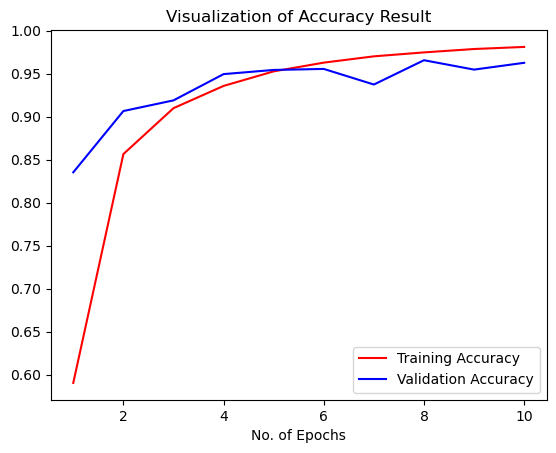

In [24]:
 epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Predictions and Evaluation

In [44]:
class_name = validation_set.class_names

# Load Test Dataset

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#  Make predictions

In [47]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step


(array([[9.9703598e-01, 2.9410627e-03, 5.5808704e-07, ..., 8.6155263e-11,
         2.6688038e-10, 4.8075117e-09],
        [9.9999475e-01, 4.1892677e-06, 4.1545059e-10, ..., 5.2864951e-16,
         1.7710116e-15, 7.1453293e-13],
        [9.9998915e-01, 1.0429222e-05, 1.1115885e-07, ..., 1.6012933e-13,
         1.5131837e-11, 2.0257733e-09],
        ...,
        [1.0087138e-08, 1.9471377e-15, 2.2667075e-08, ..., 5.0506535e-12,
         8.0383427e-14, 9.9999774e-01],
        [3.6540190e-08, 1.6017367e-15, 1.0236745e-09, ..., 2.3315039e-12,
         6.0283138e-14, 1.0000000e+00],
        [7.0272698e-12, 3.0492514e-13, 7.7808975e-12, ..., 1.1168785e-13,
         1.1360876e-11, 9.9999809e-01]], dtype=float32),
 (17572, 38))

In [48]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [49]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

# Get true categories

In [52]:
true_categories= tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [53]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

# Classification report

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.98      0.93       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [56]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[496,   3,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   1, 436, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 469,   0,   0],
       [  0,   0,   1, ...,   0, 445,   0],
       [  2,   0,   1, ...,   0,   0, 475]], dtype=int64)

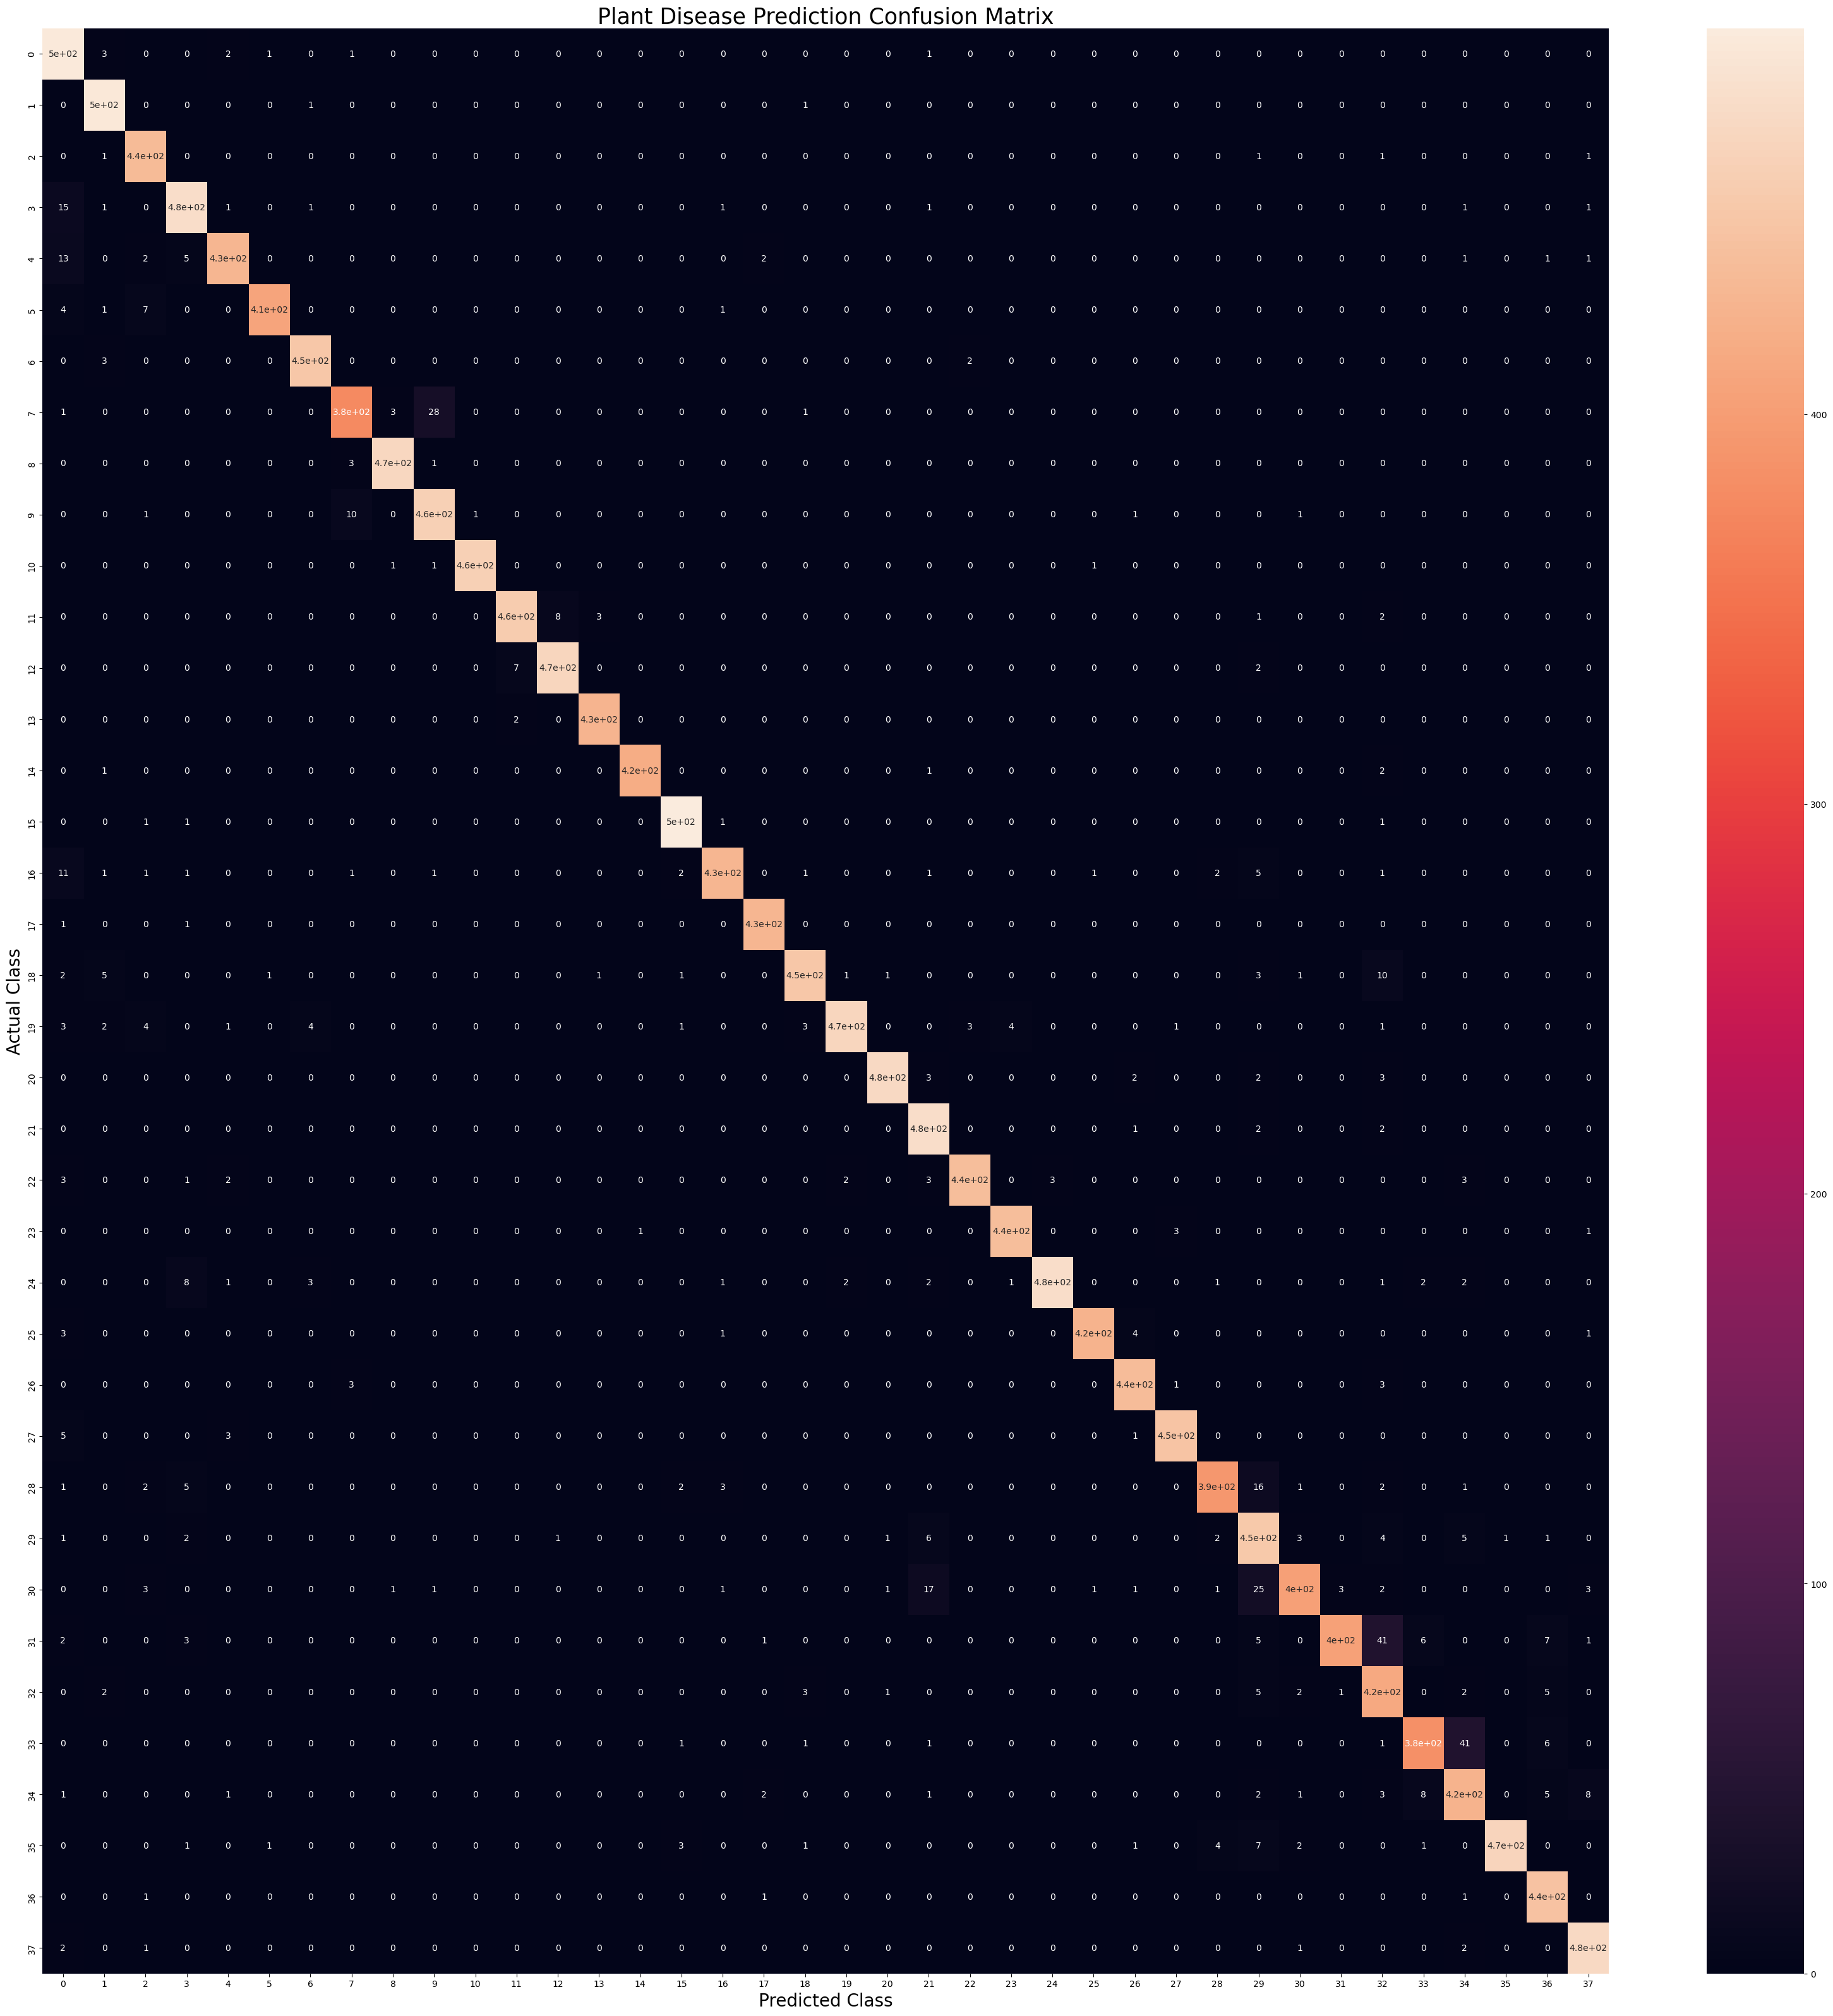

In [57]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()